# Black Body Radiation

In [1]:
from numpy import exp, log, array, linspace, empty, linalg
from matplotlib import pyplot as plt
from scipy.constants import h, c, k, pi
from scipy.integrate import simpson
import scienceplots

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee', 'grid'])
plt.rcParams["figure.figsize"] = (10, 5)

## Planck's Distribution Law

The spectral distribution of of a black body radiation at a specific temperature $T$ is given by,

$$\rho(\lambda , T) = \frac{8\pi h c}{\lambda^5} \frac{1}{\exp(hc/\lambda k_B T) - 1}$$

In [2]:
def planck_distribution(T, wavelength_i, wavelength_f, n=1000):
    wavelength = linspace(wavelength_i, wavelength_f, n)
    distribution = ((8 * pi * h * c) / wavelength**5) * \
        (1 / (exp((h * c) / (wavelength * k * T)) - 1))

    return wavelength, distribution

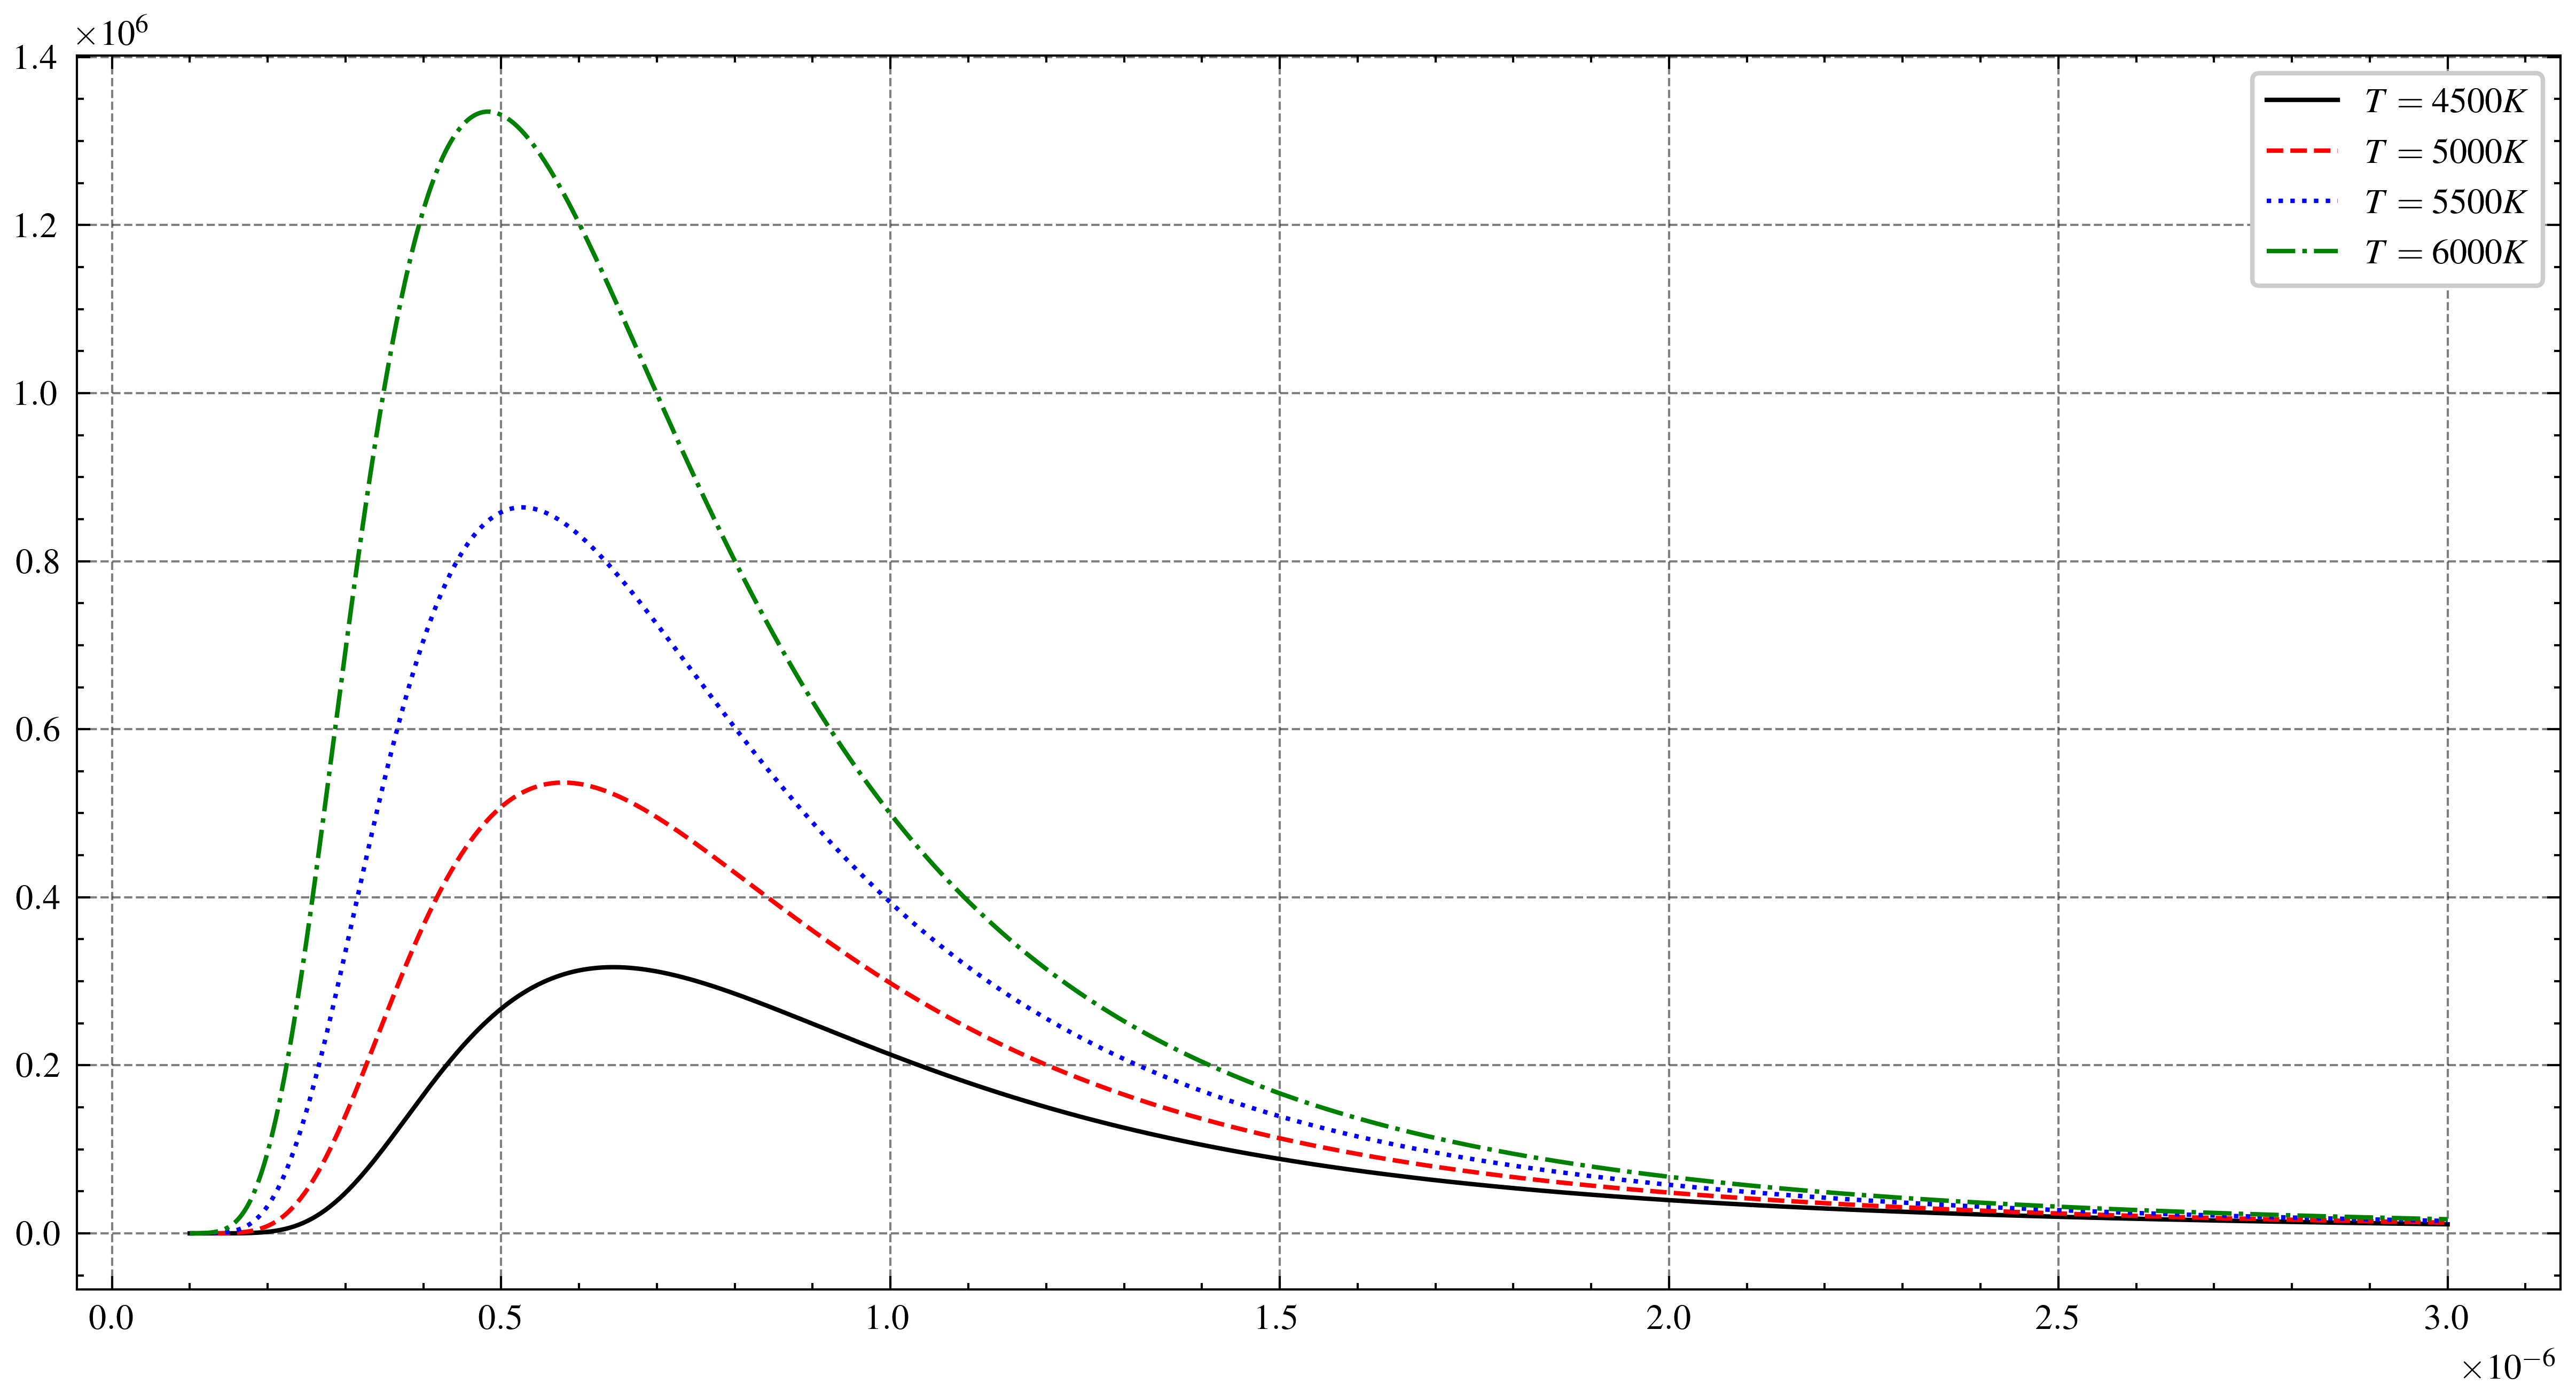

In [3]:
wavelength_i = 0.1e-6
wavelength_f = 3e-6

T = 4500, 5000, 5500, 6000

for i in range(len(T)):
    wavelength, distribution = planck_distribution(
        T[i], wavelength_i, wavelength_f)

    plt.plot(wavelength, distribution, label=f"$T={T[i]}K$")

plt.legend()
plt.show()

## Stefan-Boltzman Law
The Stefan-Boltzman law states that the total radiation emmitted accross all wavelengths is proportional to to the temperature $T$ to the power 4.

\begin{align*}
&\int\limits_0^\infty \rho(\lambda, T) d\lambda &\propto T^N \\
R(T)=&\int\limits_0^\infty \rho(\lambda, T) d\lambda &= \sigma \; T^N
\end{align*}


If we take logarithm on both sides,

\begin{align*}
\log R &= \log \sigma + N \log T
\end{align*}

Plotting $\log R$ vs $\log T$, will give a straight line with slope $N$.


In [4]:
def integrate_planck_distribution(T_i, T_f, wavelength_i, wavelength_f, n=1000):
    T = linspace(T_i, T_f, n)
    R = empty(len(T))

    for i in range(len(T)):
        wavelength, distribution = planck_distribution(
            T[i], wavelength_i, wavelength_f)

        R[i] = simpson(distribution, x=wavelength)

    return T, R

In [5]:
def least_square_fit(y, x):
    A = array([[sum(x**2), sum(x)], [sum(x), len(x)]])
    B = array([sum(x*y), sum(y)])

    m, c = linalg.solve(A, B)

    return m, c


In [6]:
T_i = 2000
T_f = 6000

wavelength_i = 0.1e-6
wavelength_f = 10e-6

T, R = integrate_planck_distribution(T_i, T_f, wavelength_i, wavelength_f)

m, c = least_square_fit(log(R), log(T))

print(f"The value of the N is {m}")

The value of the N is 4.009993438002846
